In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import imageio
import geoplot as gplt

%matplotlib inline

## Reading data for merging

- Shape files to draw and visualize maps
- Meta data of all the boundaries
- Facebook movement data

In [2]:
# Please change the base path according to where the data has been downloaded locally on your machine
base_path = '../../DataKind/'

In [3]:
# Reading shape files. All admin levels have different shape files.

admin0_shp = gpd.read_file(base_path + 'bgd_adm_bbs_20201113_SHP/bgd_admbnda_adm0_bbs_20201113.shp')
admin1_shp = gpd.read_file(base_path + 'bgd_adm_bbs_20201113_SHP/bgd_admbnda_adm1_bbs_20201113.shp')
admin2_shp = gpd.read_file(base_path + 'bgd_adm_bbs_20201113_SHP/bgd_admbnda_adm2_bbs_20201113.shp')
admin3_shp = gpd.read_file(base_path + 'bgd_adm_bbs_20201113_SHP/bgd_admbnda_adm3_bbs_20201113.shp')

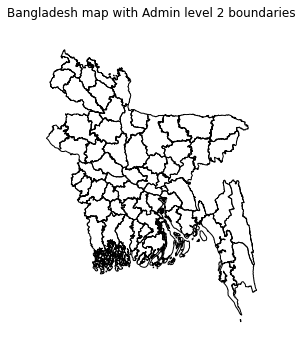

In [4]:
# Visualize what shape files look like..

gplt.polyplot(admin2_shp)
plt.title('Bangladesh map with Admin level 2 boundaries')
plt.show()

In [5]:
# Reading file having names of all admin levels.
# Can serve as an intermediary for joining shape files with other data

admin = pd.read_excel(base_path + 'bgd_adminboundaries_tabulardata.xlsx')

print(admin.shape)

admin.head()

(5160, 20)


,OBJECTID *,Shape *,admin4Name_en,admin4Pcode,admin4RefName,admin4AltName1_en,admin4AltName2_en,admin3Name_en,admin3Pcode,admin2Name_en,admin2Pcode,admin1Name_en,admin1Pcode,admin0Name_en,admin0Pcode,date,validOn,validTo,Shape_Length,Shape_Area
0,1,Polygon,Abaipur,BD40448010,<Null>,<Null>,<Null>,Shailkupa,BD404480,Jhenaidah,BD4044,Khulna,BD40,Bangladesh,BD,2015-01-01,2020-11-13,<Null>,0.286382,0.001944
1,2,Polygon,Abdullahpur,BD30599411,<Null>,<Null>,<Null>,Tongibari,BD305994,Munshiganj,BD3059,Dhaka,BD30,Bangladesh,BD,2015-01-01,2020-11-13,<Null>,0.098597,0.000317
2,3,Polygon,Abdullapur,BD10092513,<Null>,<Null>,<Null>,Char Fasson,BD100925,Bhola,BD1009,Barisal,BD10,Bangladesh,BD,2015-01-01,2020-11-13,<Null>,0.170051,0.001055
3,4,Polygon,Abdullapur,BD20153311,<Null>,<Null>,<Null>,Fatikchhari,BD201533,Chittagong,BD2015,Chittagong,BD20,Bangladesh,BD,2015-01-01,2020-11-13,<Null>,0.055861,0.000172
4,5,Polygon,Abdulpur,BD40507916,<Null>,<Null>,<Null>,Kushtia Sadar,BD405079,Kushtia,BD4050,Khulna,BD40,Bangladesh,BD,2015-01-01,2020-11-13,<Null>,0.312536,0.002235


In [7]:
# Reading movement data provided by facebook. Note the delimeter param

df = pd.read_csv(base_path + 'movement-range-data-2021-03-03/movement-range-2021-03-03.txt', delimiter='\t')

# Keeping data only for Bangladesh
df = df[df.country == 'BGD']
df.head()

/Users/romitjain/.virtualenvs/dk/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ds,country,polygon_source,polygon_id,polygon_name,all_day_bing_tiles_visited_relative_change,all_day_ratio_single_tile_users,baseline_name,baseline_type
313032,2020-03-01,BGD,GADM,BGD.1.1_1,Barguna,-0.01691,0.15872,full_february,DAY_OF_WEEK
313033,2020-03-02,BGD,GADM,BGD.1.1_1,Barguna,0.06122,0.14826,full_february,DAY_OF_WEEK
313034,2020-03-03,BGD,GADM,BGD.1.1_1,Barguna,0.03685,0.14999,full_february,DAY_OF_WEEK
313035,2020-03-04,BGD,GADM,BGD.1.1_1,Barguna,-0.03045,0.15846,full_february,DAY_OF_WEEK
313036,2020-03-05,BGD,GADM,BGD.1.1_1,Barguna,0.00872,0.16401,full_february,DAY_OF_WEEK


In [9]:
# In facebook movement data, the polygon name corresponds to Admin level 2
print(df.polygon_name.unique())

['Barguna' 'Barisal' 'Bhola' 'Jhalokati' 'Patuakhali' 'Pirojpur'
 'Noakhali' 'Rangamati' 'Bandarban' 'Brahamanbaria' 'Chandpur'
 'Chittagong' 'Comilla' "Cox'S Bazar" 'Feni' 'Khagrachhari' 'Lakshmipur'
 'Mymensingh' 'Narayanganj' 'Narsingdi' 'Netrakona' 'Rajbari' 'Shariatpur'
 'Sherpur' 'Tangail' 'Dhaka' 'Faridpur' 'Gazipur' 'Gopalganj' 'Jamalpur'
 'Kishoreganj' 'Madaripur' 'Manikganj' 'Munshiganj' 'Satkhira' 'Bagerhat'
 'Chuadanga' 'Jessore' 'Jhenaidah' 'Khulna' 'Kushtia' 'Magura' 'Meherpur'
 'Narail' 'Bogra' 'Joypurhat' 'Naogaon' 'Natore' 'Nawabganj' 'Pabna'
 'Rajshahi' 'Sirajganj' 'Dinajpur' 'Gaibandha' 'Kurigram' 'Lalmonirhat'
 'Nilphamari' 'Panchagarh' 'Rangpur' 'Thakurgaon' 'Habiganj' 'Maulvibazar'
 'Sunamganj' 'Sylhet']


In [10]:
# Adding different datetime columns to index on them later
# Will take some time...

df['ds'] = pd.to_datetime(df.ds)
df['ds_year'] = df.ds.apply(lambda y: y.year)
df['ds_month'] = df.ds.apply(lambda y: y.month)
df['ds_day'] = df.ds.apply(lambda y: y.day)

In [11]:
# Join data: shape file to facebook data
# 2 notes: Filtered on bangladesh country and selected the latest date for the purpose of visualization

merged_data = admin2_shp.set_index('ADM2_EN').join(
    df[(df.ds == df.ds.max())].set_index('polygon_name')
)

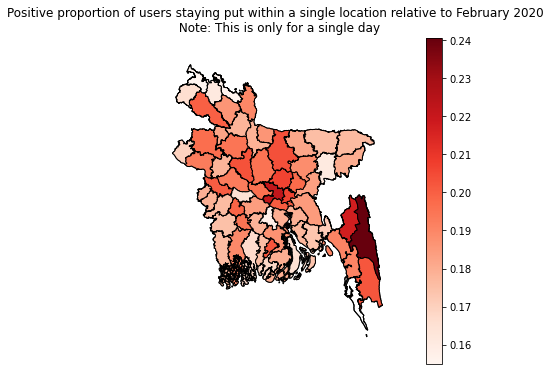

In [12]:
"""
Plotting the graph for 1 day showing:
Positive proportion of users stayiung put within a single location relative to February 2020
"""

ax = gplt.polyplot(merged_data)

gplt.choropleth(
    merged_data,
    hue='all_day_ratio_single_tile_users',
    edgecolor='black',
    linewidth=1,
    cmap='Reds',
    legend=True,
    ax=ax
)

plt.title('Positive proportion of users staying put within a single location relative to February 2020 \n Note: This is only for a single day')
plt.show()

In [64]:
def single_plot(shp, ts_data, dt):
    # Join data: shape file to facebook data
    # 2 notes: Filtered on bangladesh country and selected the latest date for the purpose of visualization

    merged_data = shp.set_index('ADM2_EN').join(
        ts_data[(ts_data.ds == dt)].set_index('polygon_name')
    )

    merged_data.reset_index(inplace=True)
    
    """
    Plotting the graph for 1 day showing:
    Positive proportion of users stayiung put within a single location relative to February 2020
    """

    ax = gplt.polyplot(merged_data)
    gplt.choropleth(
        merged_data,
        hue='all_day_ratio_single_tile_users',
        edgecolor='black',
        linewidth=1,
        cmap='Reds',
        legend=True,
        ax=ax
    )
    
    file_name = f'plots/facebook_merge_{dt}.png'
    
    plt.title(f'Positive proportion of users staying put within a single location relative to previous month\n For {dt}')
    plt.savefig(file_name)
    plt.close()
    
    return file_name

def animate_plot(shp, ts_data, dt_range):
    file_names = []

    for dt in dt_range:
        file_name = single_plot(shp, ts_data, dt)
        file_names.append(file_name)
        print(f'Saved the plot at {file_name}')

    images = []
    for file_name in file_names:
        images.append(imageio.imread(file_name))

    gif_path = 'plots/time_series_movement.gif'
    imageio.mimsave(gif_path, images, fps=1)

In [65]:
# Create a date range for time series plot
dt_range = pd.Series(df[(df.ds_month == 2) & (df.ds_year == 2021)].ds.unique())

animate_plot(admin2_shp, df, dt_range)

Saved the plot at plots/facebook_merge_2021-02-01 00:00:00.png
Saved the plot at plots/facebook_merge_2021-02-02 00:00:00.png
Saved the plot at plots/facebook_merge_2021-02-03 00:00:00.png
Saved the plot at plots/facebook_merge_2021-02-04 00:00:00.png
Saved the plot at plots/facebook_merge_2021-02-05 00:00:00.png
Saved the plot at plots/facebook_merge_2021-02-06 00:00:00.png
Saved the plot at plots/facebook_merge_2021-02-07 00:00:00.png
Saved the plot at plots/facebook_merge_2021-02-08 00:00:00.png
Saved the plot at plots/facebook_merge_2021-02-09 00:00:00.png
Saved the plot at plots/facebook_merge_2021-02-10 00:00:00.png
Saved the plot at plots/facebook_merge_2021-02-11 00:00:00.png
Saved the plot at plots/facebook_merge_2021-02-12 00:00:00.png
Saved the plot at plots/facebook_merge_2021-02-13 00:00:00.png
Saved the plot at plots/facebook_merge_2021-02-14 00:00:00.png
Saved the plot at plots/facebook_merge_2021-02-15 00:00:00.png
Saved the plot at plots/facebook_merge_2021-02-16 00:00